In [70]:
library(tidyverse)
library(dplyr)
library(ggtext)
library(showtext)
library(ggplot2)
library(scico)
library(ggnewscale)
library(cowplot)

In [152]:
plotData <- read.table("./plotData.csv", header = F)
plotData$g1Rank <- rank(plotData$V2)
plotData$g2Rank <- rank(plotData$V4)
dim(plotData)

[1] 40  6

In [153]:
df=plotData %>% pivot_longer(
    cols = c('V1','V3'),
    names_to = 'g',
    values_to = 'definition'
    ) %>% pivot_longer(
        cols = c("V2","V4"),
        values_to = 'pct'
    ) %>% filter(
        ((g=='V1')&(name=='V2'))|((g=='V3')&(name=='V4'))
    )%>% 

     pivot_longer(
        cols=c("g1Rank","g2Rank"),
        names_to = 'gName',
        values_to='rank'
    ) %>% select(c('g','definition','pct','rank')) %>%  distinct()

In [154]:
df=df %>% mutate(g2=ifelse(g=='V1',1,2)) %>%
    select(c('g2','definition','pct','rank'))
colnames(df)=c('g','definition','pct','rank')
head(df)

g,definition,pct,rank
<dbl>,<fct>,<dbl>,<dbl>
1,DeltaMsASK,0.16646915,40
2,DeltaMsASK,0.11373716,40
1,MsASK,0.07551996,39
2,MsASK,0.07658484,39
1,MconMs3.0,0.06805004,38
2,MsAveML3.0,0.06917767,38


png 
  2

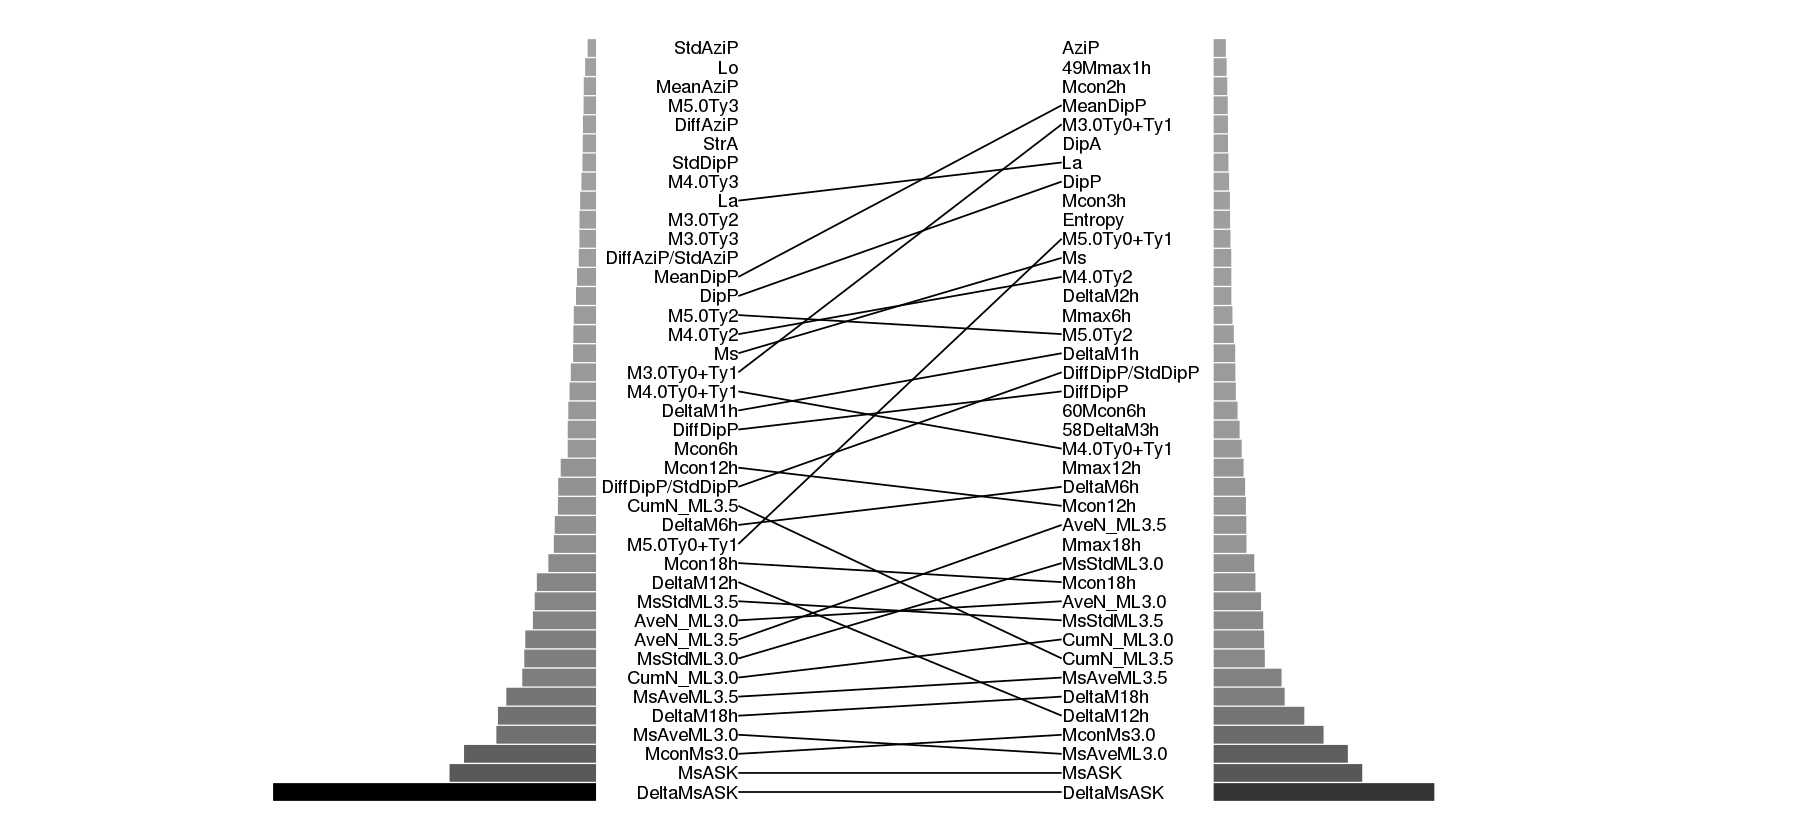

In [197]:
options(repr.plot.width=15,repr.plot.hight=10)
# 两组相同的部分（即先筛选出出现频率为2的部分）
selected = df %>% select(definition, g) %>% 
  count(definition) %>%
  filter(n==2) %>%
  pull(definition)
# Plot
# 注意scico,cowplot,ggnewscaled包是否安装
distance=50
textwidth=45
p=df %>%
  ggplot(aes(x=g, y=rank)) +
  geom_text(aes(label=definition, x =ifelse(g==1,-1*distance,distance),hjust=ifelse(g==1,1,0)))+
  geom_line(data=df %>% filter(definition %in% selected),
            aes(group=definition,x=ifelse(g==1,-1*distance,distance))) +
  geom_segment(data=df %>% filter(g==2),
               aes(x=g+distance+textwidth, xend=g+distance+textwidth+pct*600, y=rank, yend=rank+0, color=pct), size=5) +
  geom_segment(data=df %>% filter(g==1),
               aes(x=g-distance-textwidth, xend=g-distance-textwidth-pct*600, y=rank, yend=rank+0, color=pct), size=5) +
  scico::scale_color_scico(begin = 0.04,end=1,midpoint =0.05,  palette="grayC") +
  ggnewscale::new_scale_color() +
  scale_y_reverse() +
  scale_x_continuous(limits=c(-200-distance,200+distance)) +
  cowplot::theme_map(13)+
  theme(
    legend.position = "none",
    )
svg("bar.svg",width = 15,height = 10)
print(p)
dev.off()
p